###Time series animation of MD simulation trajectory on its free energy surface

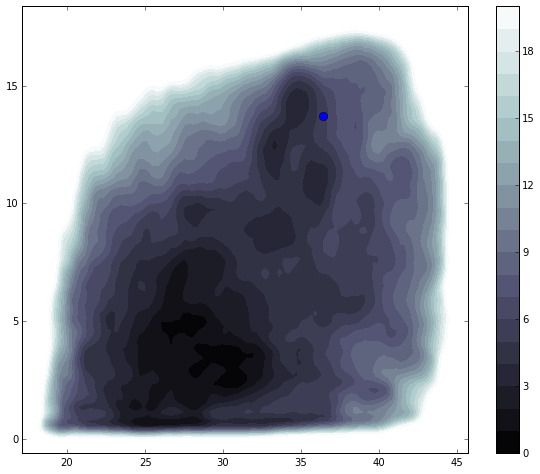

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

with open("COLVAR_w350") as f:
    data = f.read()
data = data.split("\n")
data = data[1:-1]
x = [row.strip().split()[3] for row in data]
y = [row.strip().split()[4] for row in data]
x_1 = float(x[0])
y_1 = float(y[0])

fesdata = np.genfromtxt('fes.water.dat')
dim = int(np.sqrt(np.size(fesdata)/3))
X = np.reshape(fesdata[:, 0], [dim, dim], order='F')
Y = np.reshape(fesdata[:, 1], [dim, dim], order='F')
Z = np.reshape((fesdata[:, 2]-np.min(fesdata[:, 2]))/4.184, [dim, dim], order="F")

spacer = 1
lines = 20
levels = np.linspace(0, lines*spacer, num=(lines+1), endpoint=True)

fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(111)

line, = axes.plot(y_1, x_1, marker="o", markersize=8, linestyle='None')
# axes.set_ylim(0,20)
# axes.set_xlim(15,45)

plt.contourf(X, Y, Z, levels, cmap=plt.cm.bone)
plt.colorbar()


def update(data):
    line.set_data(data)
    return line,


def data_gen():
    while True:
        for i in range(1, len(x)):
            yield (float(y[i]), float(x[i]))


ani = animation.FuncAnimation(fig, update, data_gen, interval=100)


# ani.save('animation2.mp4', fps=10,bitrate=1800,extra_args=['-vcodec', 'libx264'])
plt.show()
